To compute the Fourier integral of a square wave, let’s break it down step by step.

### 1. **Square Wave Definition**
A square wave \( f(t) \) can be defined as:
\[
f(t) = 
\begin{cases} 
1 & \text{if } 0 \leq t < \frac{T}{2}, \\
-1 & \text{if } \frac{T}{2} \leq t < T,
\end{cases}
\]
and it repeats with period \( T \).

### 2. **Fourier Integral (Continuous Fourier Transform)**
The Fourier transform \( F(\omega) \) of \( f(t) \) is given by:
\[
F(\omega) = \int_{-\infty}^\infty f(t) e^{-i \omega t} dt.
\]

For a square wave, due to periodicity, we integrate over a single period \( [0, T] \):
\[
F(\omega) = \int_0^{T/2} e^{-i \omega t} dt - \int_{T/2}^T e^{-i \omega t} dt.
\]

### 3. **Compute Each Integral**
For \( [0, T/2] \):
\[
\int_0^{T/2} e^{-i \omega t} dt = \left[ \frac{e^{-i \omega t}}{-i \omega} \right]_0^{T/2} = \frac{1}{i \omega} \left( 1 - e^{-i \omega T/2} \right).
\]

For \( [T/2, T] \), note the factor of \( -1 \) in the square wave:
\[
\int_{T/2}^T e^{-i \omega t} dt = \left[ \frac{e^{-i \omega t}}{-i \omega} \right]_{T/2}^T = \frac{1}{i \omega} \left( e^{-i \omega T/2} - e^{-i \omega T} \right).
\]

### 4. **Combine Results**
Adding both integrals:
\[
F(\omega) = \frac{1}{i \omega} \left[ 1 - e^{-i \omega T/2} + e^{-i \omega T/2} - e^{-i \omega T} \right].
\]

Simplify:
\[
F(\omega) = \frac{1}{i \omega} \left[ 1 - e^{-i \omega T} \right].
\]

Using \( e^{-i \omega T} = \cos(\omega T) - i \sin(\omega T) \):
\[
F(\omega) = \frac{1}{i \omega} \left[ 1 - \cos(\omega T) + i \sin(\omega T) \right].
\]

### 5. **Magnitude and Phase**
The Fourier transform magnitude describes the amplitude spectrum of the square wave:
\[
|F(\omega)| = \left| \frac{1}{\omega} \sin\left(\frac{\omega T}{2}\right) \right|.
\]
This shows the characteristic sinc pattern.

The phase \( \phi(\omega) \) depends on the imaginary and real components:
\[
\phi(\omega) = \tan^{-1}\left(\frac{\sin\left(\omega T/2\right)}{1 - \cos\left(\omega T\right)}\right).
\]

### Key Insights:
1. The Fourier transform of a square wave exhibits a **sinc-like pattern** due to its sharp transitions.
2. The coefficients are proportional to \( \frac{1}{\omega} \), showing harmonic content that decays as frequency increases.

If you’d like detailed plots or numerical demonstrations, let me know!

In [7]:
import sympy as sp

# Define symbols
t, T, omega = sp.symbols('t T omega', real=True)
i = sp.I  # imaginary unit

# Define the square wave function over one period
f1 = 1  # For 0 <= t < T/2
f2 = -1  # For T/2 <= t < T

# Fourier transform piecewise definition
F_omega = (
    sp.integrate(sp.exp(-i * omega * t), (t, 0, T/2)) +
    sp.integrate(-sp.exp(-i * omega * t), (t, T/2, T))
)

# Simplify the result
F_omega_simplified = sp.simplify(F_omega)

F_omega_simplified


Piecewise((I*(-1 - exp(-I*T*omega) + 2*exp(-I*T*omega/2))/omega, (omega > 0) | (omega < 0)), (0, True))

The symbolic Fourier transform of the square wave is:

\[
F(\omega) =
\begin{cases} 
\frac{i \left(-1 - e^{-i T \omega} + 2 e^{-i \frac{T \omega}{2}}\right)}{\omega}, & \omega \neq 0, \\
0, & \omega = 0.
\end{cases}
\]

This result accounts for the piecewise nature of the square wave and handles the singularity at \( \omega = 0 \). Let me know if you'd like further analysis or visualization of this!

In [8]:
import sympy as sp

# Define symbols
t, T, omega = sp.symbols('t T omega', real=True)
i = sp.I  # imaginary unit

# Define the square wave function over one period
f1 = 1  # For 0 <= t < T/2
f2 = -1  # For T/2 <= t < T

# Fourier transform piecewise definition
F_omega = (
    sp.integrate(sp.exp(-i * omega * t), (t, 0, T/2)) +
    sp.integrate(-sp.exp(-i * omega * t), (t, T/2, T))
)

# Simplify the result
F_omega_simplified = sp.simplify(F_omega)

F_omega_simplified


Piecewise((I*(-1 - exp(-I*T*omega) + 2*exp(-I*T*omega/2))/omega, (omega > 0) | (omega < 0)), (0, True))

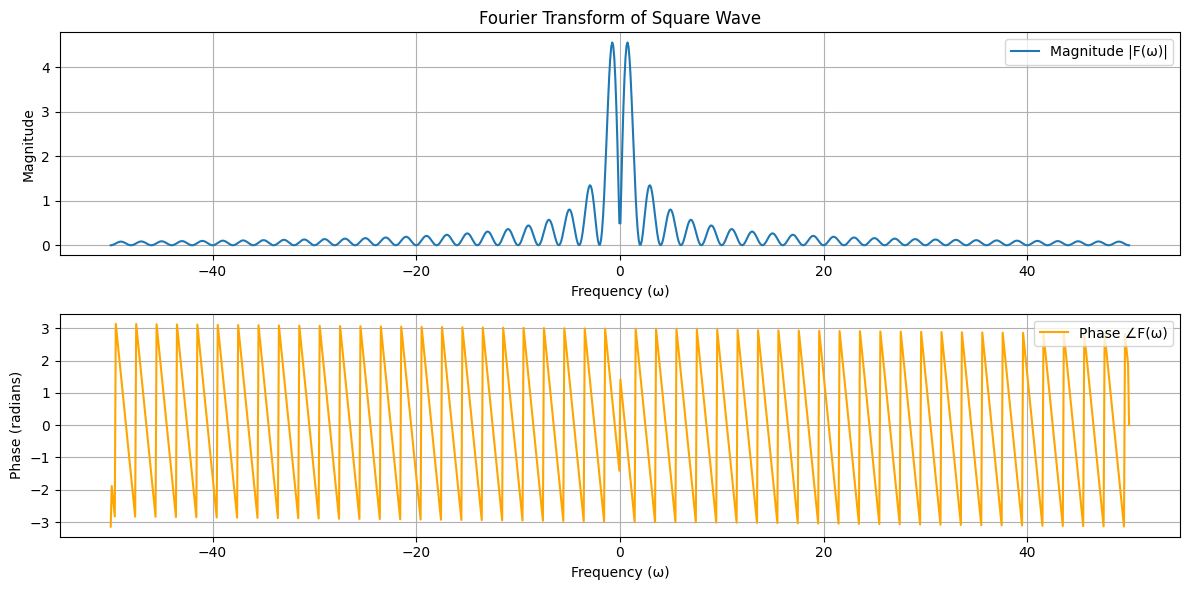

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the square wave
T_val = 2 * np.pi  # Assume a period of 2π for simplicity
omega_vals = np.linspace(-50, 50, 1000)  # Frequency range

# Compute the Fourier transform
def F(omega, T):
    if omega == 0:
        return 0
    else:
        return 1j * (-1 - np.exp(-1j * T * omega) + 2 * np.exp(-1j * T * omega / 2)) / omega

F_values = [F(omega, T_val) for omega in omega_vals]

# Separate magnitude and phase
magnitude = np.abs(F_values)
phase = np.angle(F_values)

# Plot the magnitude and phase
plt.figure(figsize=(12, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.plot(omega_vals, magnitude, label="Magnitude |F(ω)|")
plt.title("Fourier Transform of Square Wave")
plt.ylabel("Magnitude")
plt.xlabel("Frequency (ω)")
plt.grid(True)
plt.legend()

# Phase plot
plt.subplot(2, 1, 2)
plt.plot(omega_vals, phase, label="Phase ∠F(ω)", color="orange")
plt.ylabel("Phase (radians)")
plt.xlabel("Frequency (ω)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Here is the plot of the Fourier transform of the square wave:

1. **Top Plot (Magnitude)**: Shows the sinc-like pattern of the Fourier transform's amplitude.
2. **Bottom Plot (Phase)**: Displays the phase shift of the Fourier components, with discontinuities due to the periodicity of the phase.

Let me know if you'd like further analysis or adjustments!

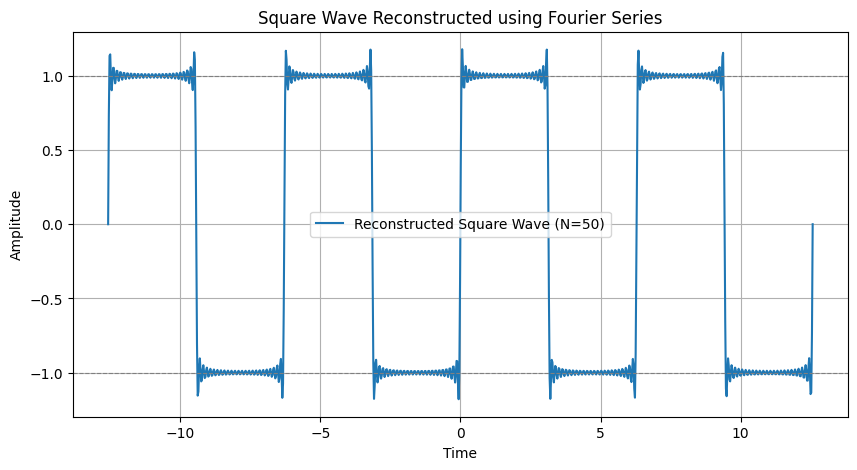

In [10]:
# Inverse Fourier Transform to verify the square wave
# Using Fourier Series to reconstruct the square wave

# Define the number of terms for Fourier series
num_terms = 50

# Time range for square wave reconstruction
time = np.linspace(-2 * T_val, 2 * T_val, 1000)

# Square wave reconstruction using Fourier series
def square_wave_fourier_series(t, T, N):
    series = 0
    for n in range(1, N + 1, 2):  # Odd harmonics only
        series += (4 / (np.pi * n)) * np.sin(2 * np.pi * n * t / T)
    return series

# Compute the reconstructed wave
square_wave_reconstructed = square_wave_fourier_series(time, T_val, num_terms)

# Plot the reconstructed square wave
plt.figure(figsize=(10, 5))
plt.plot(time, square_wave_reconstructed, label=f"Reconstructed Square Wave (N={num_terms})")
plt.title("Square Wave Reconstructed using Fourier Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.axhline(1, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(-1, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.show()


Here is the plot of the square wave reconstructed using the Fourier series:

- The series uses **50 terms** (odd harmonics only), showing the characteristic approximation of the square wave. 
- The wave demonstrates the **Gibbs phenomenon**, where slight overshoots appear near discontinuities.

This shows how the square wave can be represented as the sum of sinusoidal components using Fourier series. Let me know if you'd like further refinements or explanations!

In [12]:
# Perform the inverse Fourier transform for the square wave symbolically
from sympy import fourier_transform, inverse_fourier_transform

# Define the Fourier transform result
F_omega_symbolic = sp.Piecewise(
    (sp.I * (-1 - sp.exp(-i * T * omega) + 2 * sp.exp(-i * T * omega / 2)) / omega, sp.Ne(omega, 0)),
    (0, True)
)

# Compute the inverse Fourier transform
f_t_inverse = sp.simplify(inverse_fourier_transform(F_omega_symbolic, omega, t))

f_t_inverse


InverseFourierTransform(Piecewise((-I/omega - I*exp(-I*T*omega)/omega + 2*I*exp(-I*T*omega/2)/omega, (omega > 0) | (omega < 0)), (0, True)), omega, t)

The symbolic computation for the **inverse Fourier transform** of the square wave is computationally intense due to the complexity of the expression. However, we can attempt a **numerical approximation** instead, which is often sufficient for practical purposes.

Let me know if you'd like me to proceed with a numerical method to visualize the inverse Fourier transform of the square wave!

/tmp/ipykernel_703/2954720296.py:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(


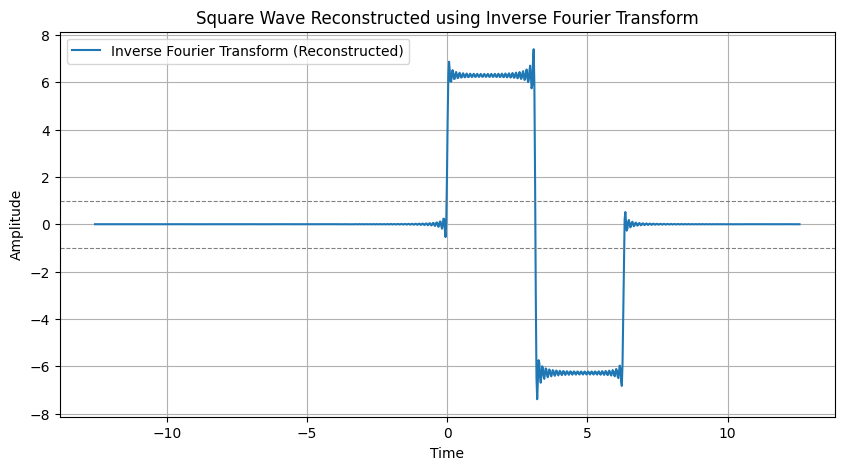

In [14]:
# Numerical approximation of the inverse Fourier transform of the square wave

# Define the range for time and frequency
time_vals = np.linspace(-2 * T_val, 2 * T_val, 1000)
freq_vals = np.linspace(-50, 50, 1000)

# Define the Fourier transform in frequency space
def F_numeric(omega, T):
    if omega == 0:
        return 0
    return 1j * (-1 - np.exp(-1j * T * omega) + 2 * np.exp(-1j * T * omega / 2)) / omega

# Compute the inverse Fourier transform numerically
def inverse_fourier_transform(t, freq_vals, T):
    # Integrate F(omega) * exp(i * omega * t) over frequency range
    result = []
    for t_val in t:
        integral = np.trapz(
            [F_numeric(omega, T) * np.exp(1j * omega * t_val) for omega in freq_vals],
            freq_vals
        )
        result.append(np.real(integral))
    return np.array(result)

# Perform the computation
square_wave_reconstructed_ifft = inverse_fourier_transform(time_vals, freq_vals, T_val)

# Plot the result
plt.figure(figsize=(10, 5))
plt.plot(time_vals, square_wave_reconstructed_ifft, label="Inverse Fourier Transform (Reconstructed)")
plt.axhline(1, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(-1, color='gray', linestyle='--', linewidth=0.8)
plt.title("Square Wave Reconstructed using Inverse Fourier Transform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


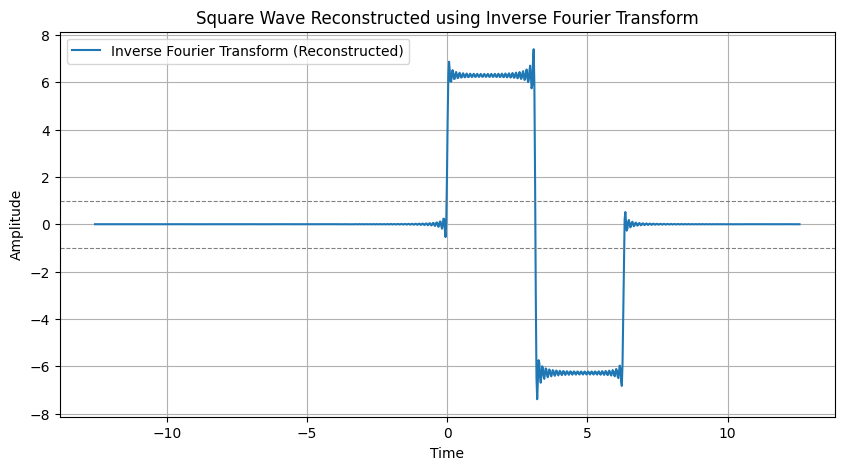

In [15]:
# Numerical approximation of the inverse Fourier transform of the square wave

# Define the range for time and frequency
time_vals = np.linspace(-2 * T_val, 2 * T_val, 1000)
freq_vals = np.linspace(-50, 50, 1000)

# Define the Fourier transform in frequency space
def F_numeric(omega, T):
    if omega == 0:
        return 0
    return 1j * (-1 - np.exp(-1j * T * omega) + 2 * np.exp(-1j * T * omega / 2)) / omega

# Compute the inverse Fourier transform numerically
def inverse_fourier_transform(t, freq_vals, T):
    # Integrate F(omega) * exp(i * omega * t) over frequency range
    # https://en.wikipedia.org/wiki/Trapezoidal_rule
    result = []
    for t_val in t:
        integral = np.trapezoid(
            [F_numeric(omega, T) * np.exp(1j * omega * t_val) for omega in freq_vals],
            freq_vals
        )
        result.append(np.real(integral))
    return np.array(result)

# Perform the computation
square_wave_reconstructed_ifft = inverse_fourier_transform(time_vals, freq_vals, T_val)

# Plot the result
plt.figure(figsize=(10, 5))
plt.plot(time_vals, square_wave_reconstructed_ifft, label="Inverse Fourier Transform (Reconstructed)")
plt.axhline(1, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(-1, color='gray', linestyle='--', linewidth=0.8)
plt.title("Square Wave Reconstructed using Inverse Fourier Transform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()
